In [1]:
!gdown 1HJOSH99mhgR7OasSy6dg21e_iTFpyljy

Downloading...
From: https://drive.google.com/uc?id=1HJOSH99mhgR7OasSy6dg21e_iTFpyljy
To: /content/cleveland.csv
100% 10.9k/10.9k [00:00<00:00, 15.3MB/s]


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleveland.csv')
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,298.000000,300.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.674497,4.730000,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,0.938202,1.941563,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        298 non-null    float64
 12  thal      300 non-null    float64
 13  target    302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.2 KB


In [8]:
df.target.value_counts()

,count
target,
0,163
1,55
2,36
3,35
4,13


In [9]:
df.target = df.target.map({0:0, 1:1, 2:1, 3:1, 4:1})
df.target.value_counts()

,count
target,
0,163
1,139


In [10]:
df.ca = df.ca.fillna(df.ca.mean())
df.thal = df.thal.fillna(df.thal.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    float64
 12  thal      302 non-null    float64
 13  target    302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.2 KB


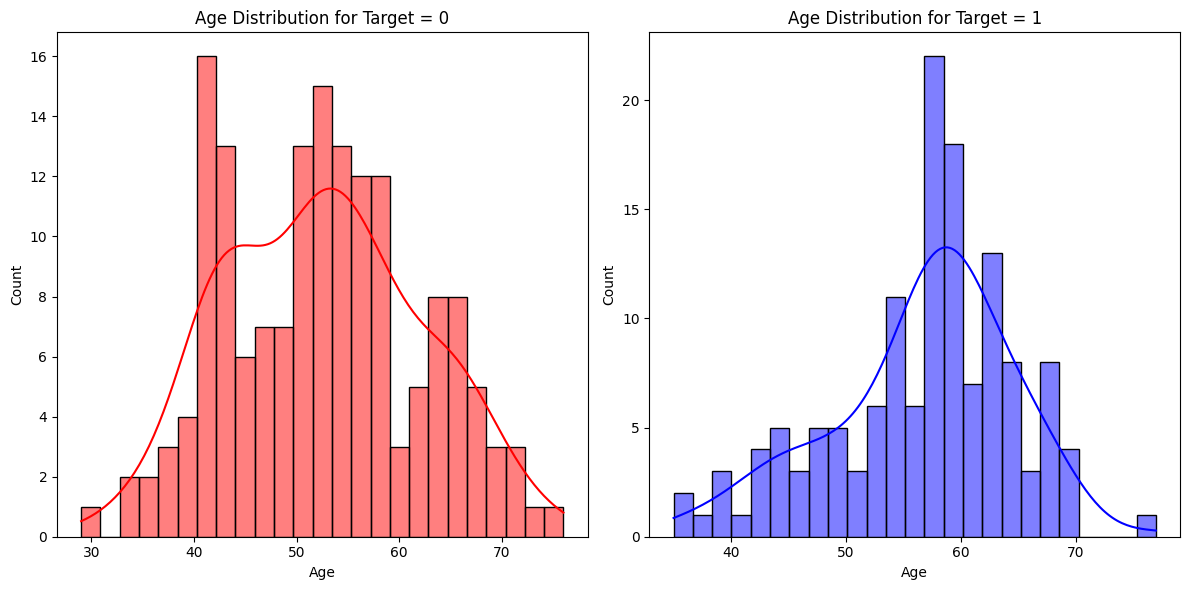

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df[df.target == 0]['age'], bins=25, kde=True, ax=axes[0], color='red')
axes[0].set_title('Age Distribution for Target = 0')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

sns.histplot(df[df.target == 1]['age'], bins=25, kde=True, ax=axes[1], color='blue')
axes[1].set_title('Age Distribution for Target = 1')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


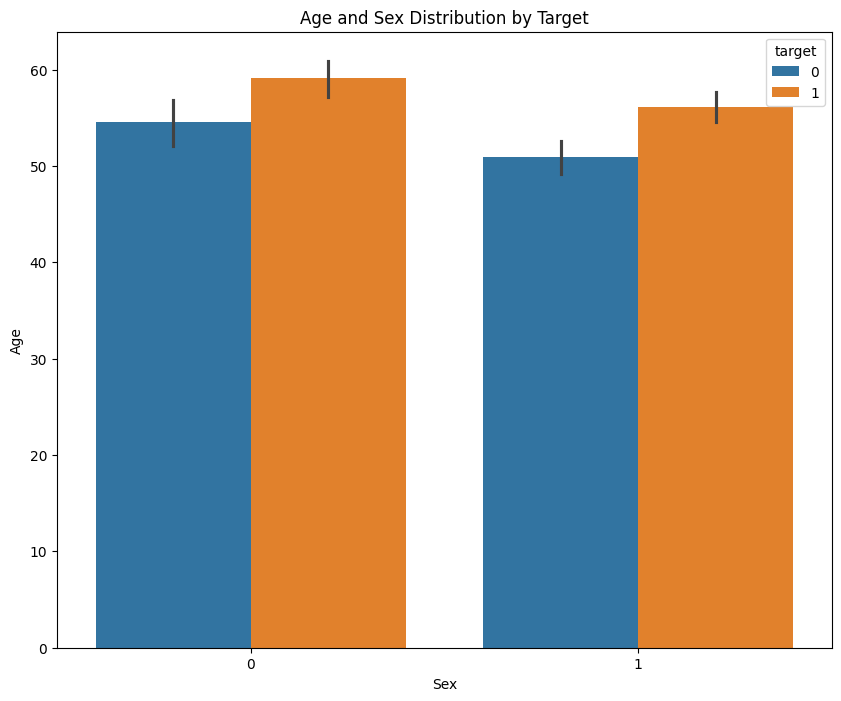

In [42]:
plt.figure(figsize=(10, 8))
sns.barplot(x='sex', y='age', hue='target', data=df)
plt.title('Age and Sex Distribution by Target')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()


In [43]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn.fit(X_train, y_train)

y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Train accuracy: ', accuracy_for_train)
print('Test accuracy: ', accuracy_for_test)


Train accuracy:  0.76
Test accuracy:  0.61


In [65]:
#svm
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred_test = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Train accuracy: ', accuracy_for_train)
print('Test accuracy: ', accuracy_for_test)

Train accuracy:  0.67
Test accuracy:  0.67


In [66]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_test = nb.predict(X_test)
y_pred_train = nb.predict(X_train)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Train accuracy: ', accuracy_for_train)
print('Test accuracy: ', accuracy_for_test)


Train accuracy:  0.85
Test accuracy:  0.85


In [67]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)
dt.fit(X_train, y_train)
y_pred_test = dt.predict(X_test)
y_pred_train = dt.predict(X_train)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Train accuracy: ', accuracy_for_train)
print('Test accuracy: ', accuracy_for_test)

Train accuracy:  1.0
Test accuracy:  0.77


In [68]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=10, min_samples_split=2, random_state=42)
rf.fit(X_train, y_train)
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Train accuracy: ', accuracy_for_train)
print('Test accuracy: ', accuracy_for_test)

Train accuracy:  0.99
Test accuracy:  0.77


In [69]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=50, learning_rate=1)
ada.fit(X_train, y_train)
y_pred_test = ada.predict(X_test)
y_pred_train = ada.predict(X_train)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Train accuracy: ', accuracy_for_train)
print('Test accuracy: ', accuracy_for_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Train accuracy:  0.94
Test accuracy:  0.79


In [70]:
#gradient boost
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, subsample=1.0, min_samples_split=2)
gb.fit(X_train, y_train)
y_pred_test = gb.predict(X_test)
y_pred_train = gb.predict(X_train)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Train accuracy: ', accuracy_for_train)
print('Test accuracy: ', accuracy_for_test)

Train accuracy:  0.99
Test accuracy:  0.82


In [71]:
#xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, random_state=42, objective='binary:logistic')
xgb.fit(X_train, y_train)
y_pred_test = xgb.predict(X_test)
y_pred_train = xgb.predict(X_train)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Train accuracy: ', accuracy_for_train)
print('Test accuracy: ', accuracy_for_test)

Train accuracy:  1.0
Test accuracy:  0.87


In [61]:
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)
gradient_boost = GradientBoostingClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)
knn = KNeighborsClassifier()
svm = SVC(random_state=42)

In [72]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('dt', decision_tree),
    ('rf', random_forest),
    ('ada', adaboost),
    ('gb', gradient_boost),
    ('xgb', xgboost),
    ('knn', knn),
    ('svm', svm)
]
stacking_class = StackingClassifier(estimators=estimators)
stacking_class.fit(X_train, y_train)
y_pred_test= stacking_class.predict(X_test)
y_pred_train = stacking_class.predict(X_train)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Train accuracy: ', accuracy_for_train)
print('Test accuracy: ', accuracy_for_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Train accuracy:  1.0
Test accuracy:  0.87
